<a href="https://colab.research.google.com/github/HanqiLouis/IPEO_Project2024/blob/main/YOLOv8Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train YOLOv8 Object Detection on a Custom Dataset

In [1]:
!nvidia-smi # for GPU only

Mon Dec 23 22:08:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8              13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 902.2/902.2 kB 38.4 MB/s eta 0:00:00


## Install YOLOvs

In [4]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 911, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'predict', 'benchmark', 'train', 'export', 'track', 'val'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'obb', 'detect', 'segment', 'pose', 'classify'}
                MODE (required) is one of {'predict', 'benchmark', 'train', 'export', 'track', 'val'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

## Train YOLOv8 Model on Custom Dataset

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Tfwn7fNUbwQgagnrhafv") # replace with your API key
project = rf.workspace("nicolai-hoirup-nielsen").project("cup-detection-v2")
dataset = project.version(3).download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Cup-Detection-v2-3 in yolov8:: 100%|██████████| 730/730 [00:00<00:00, 8726.08it/s]


In [6]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=20 imgsz=640 plots=True

100% 21.5M/21.5M [00:00<00:00, 140MB/s] 
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Cup-Detection-v2-3/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

Mean Average Precision (mAP) should increase with training epochs and get closer to 1.

### Confusion Matrix

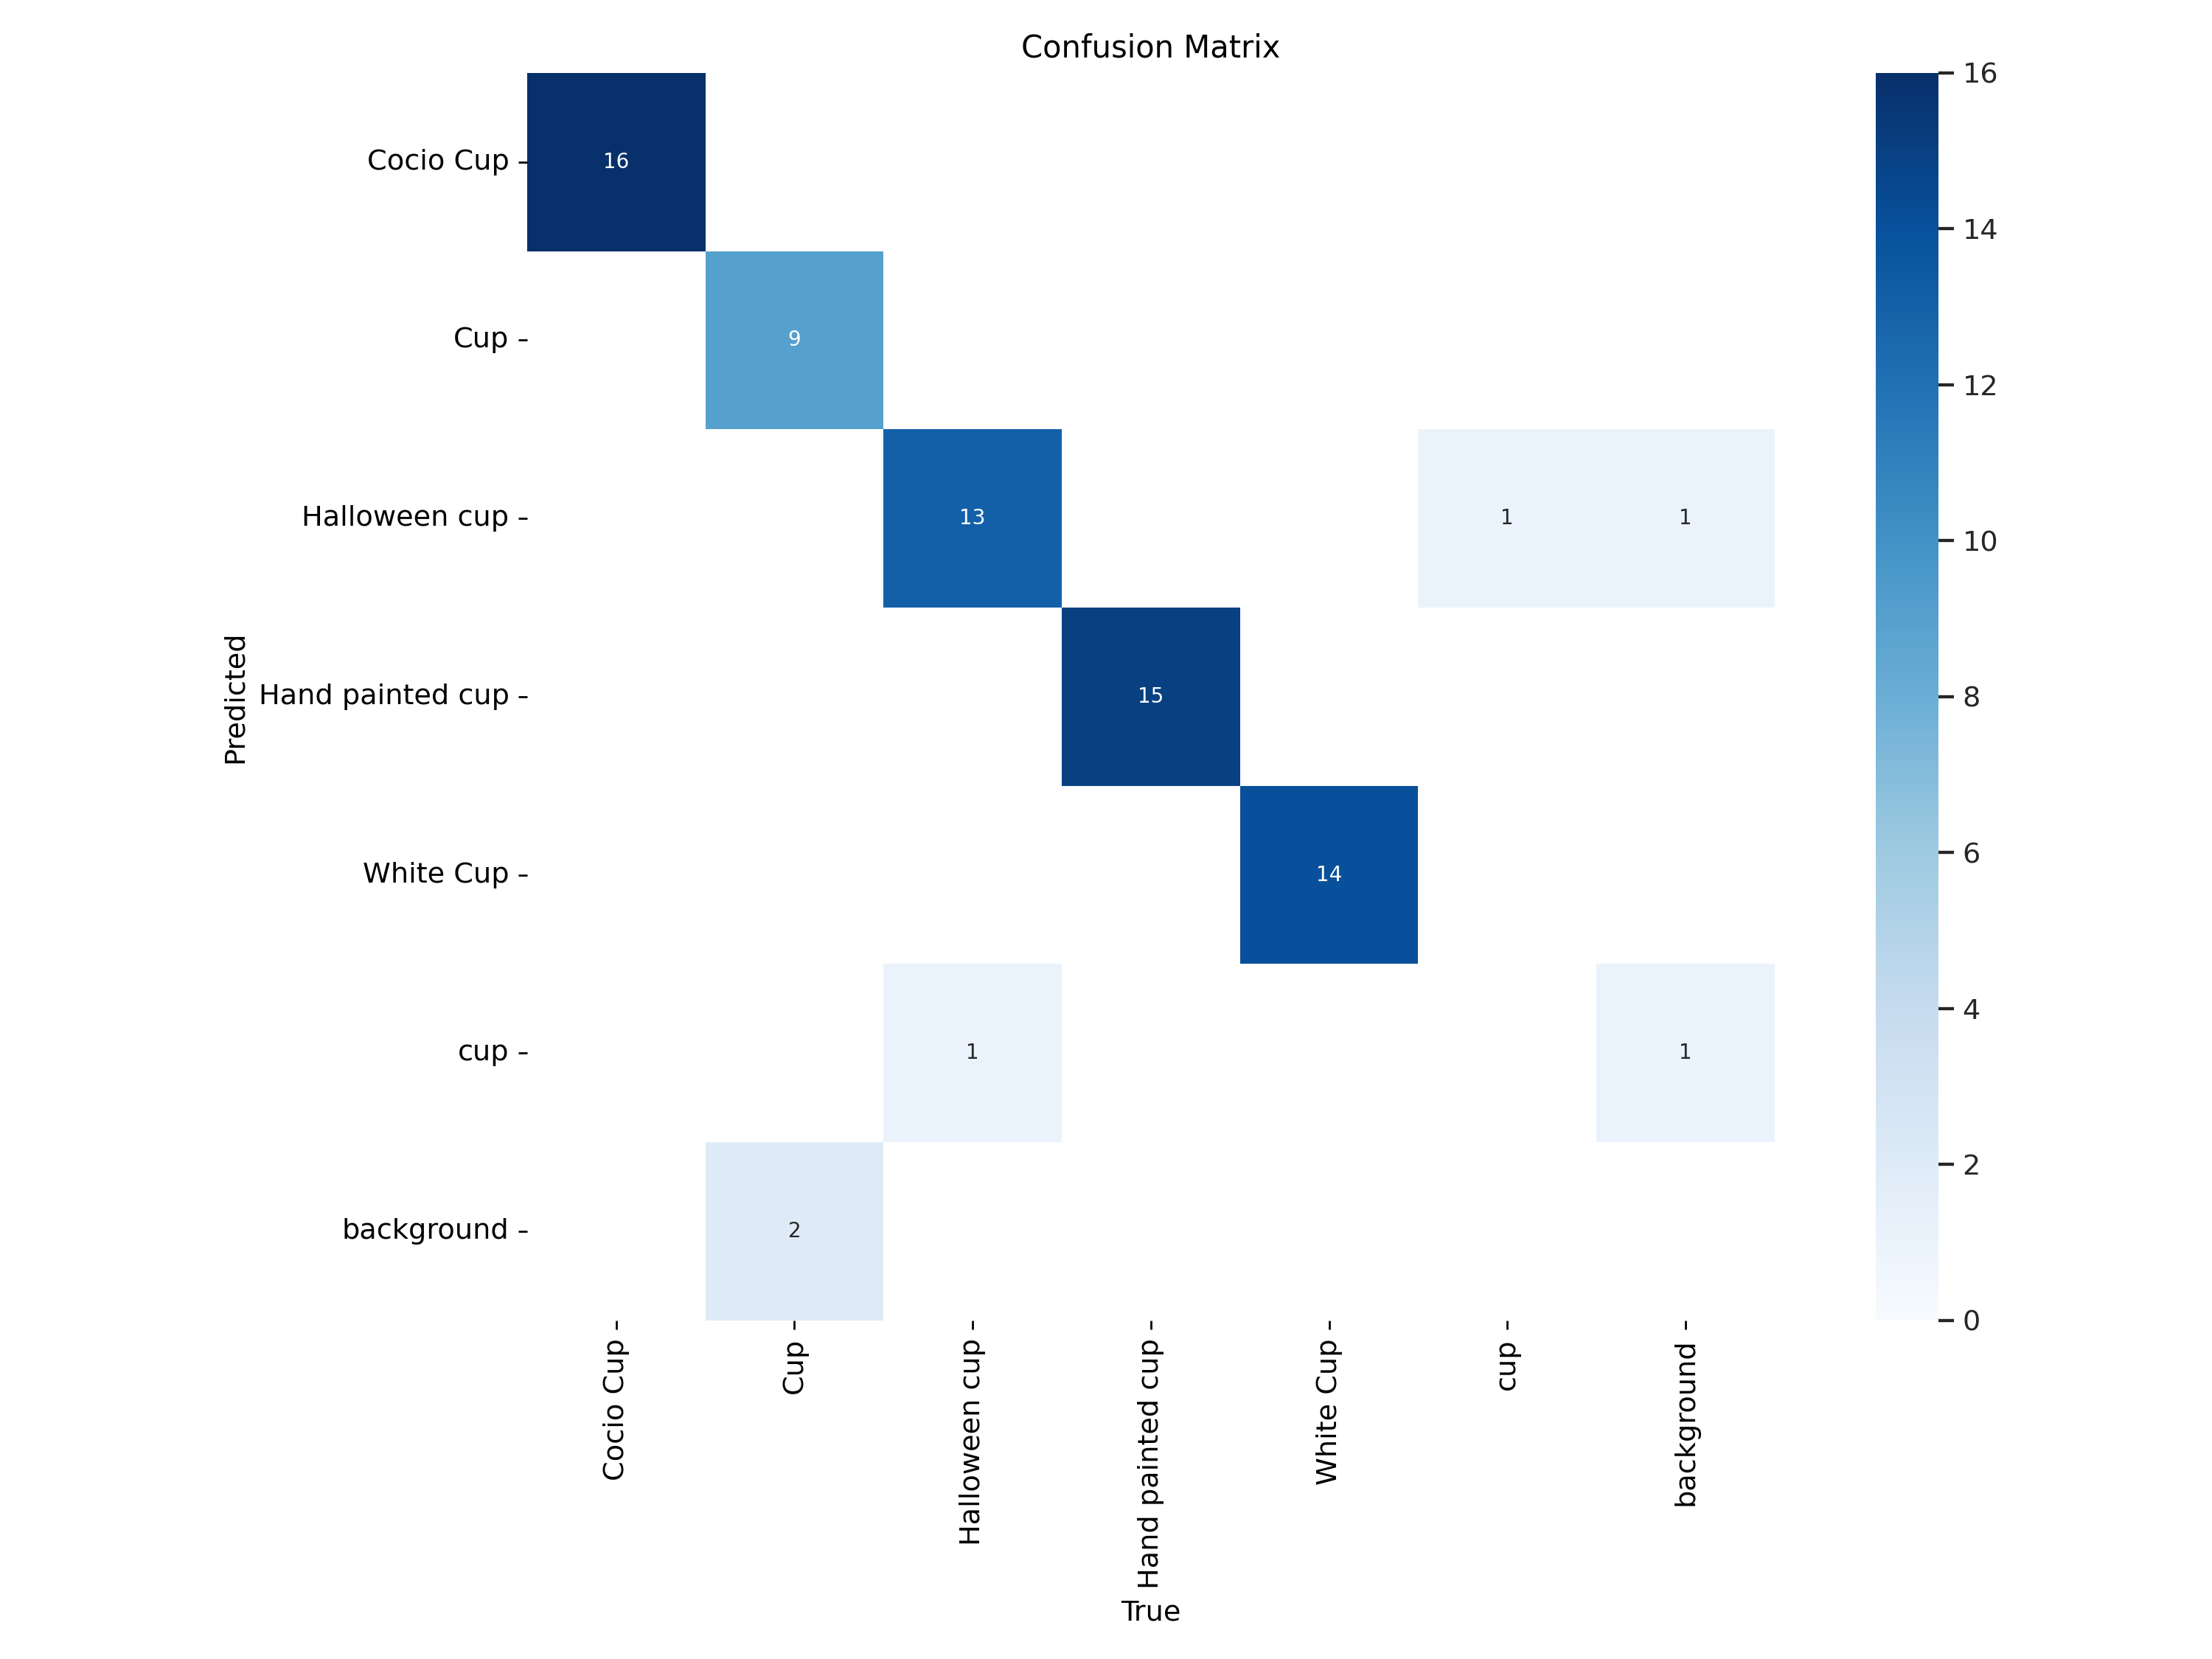

In [8]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

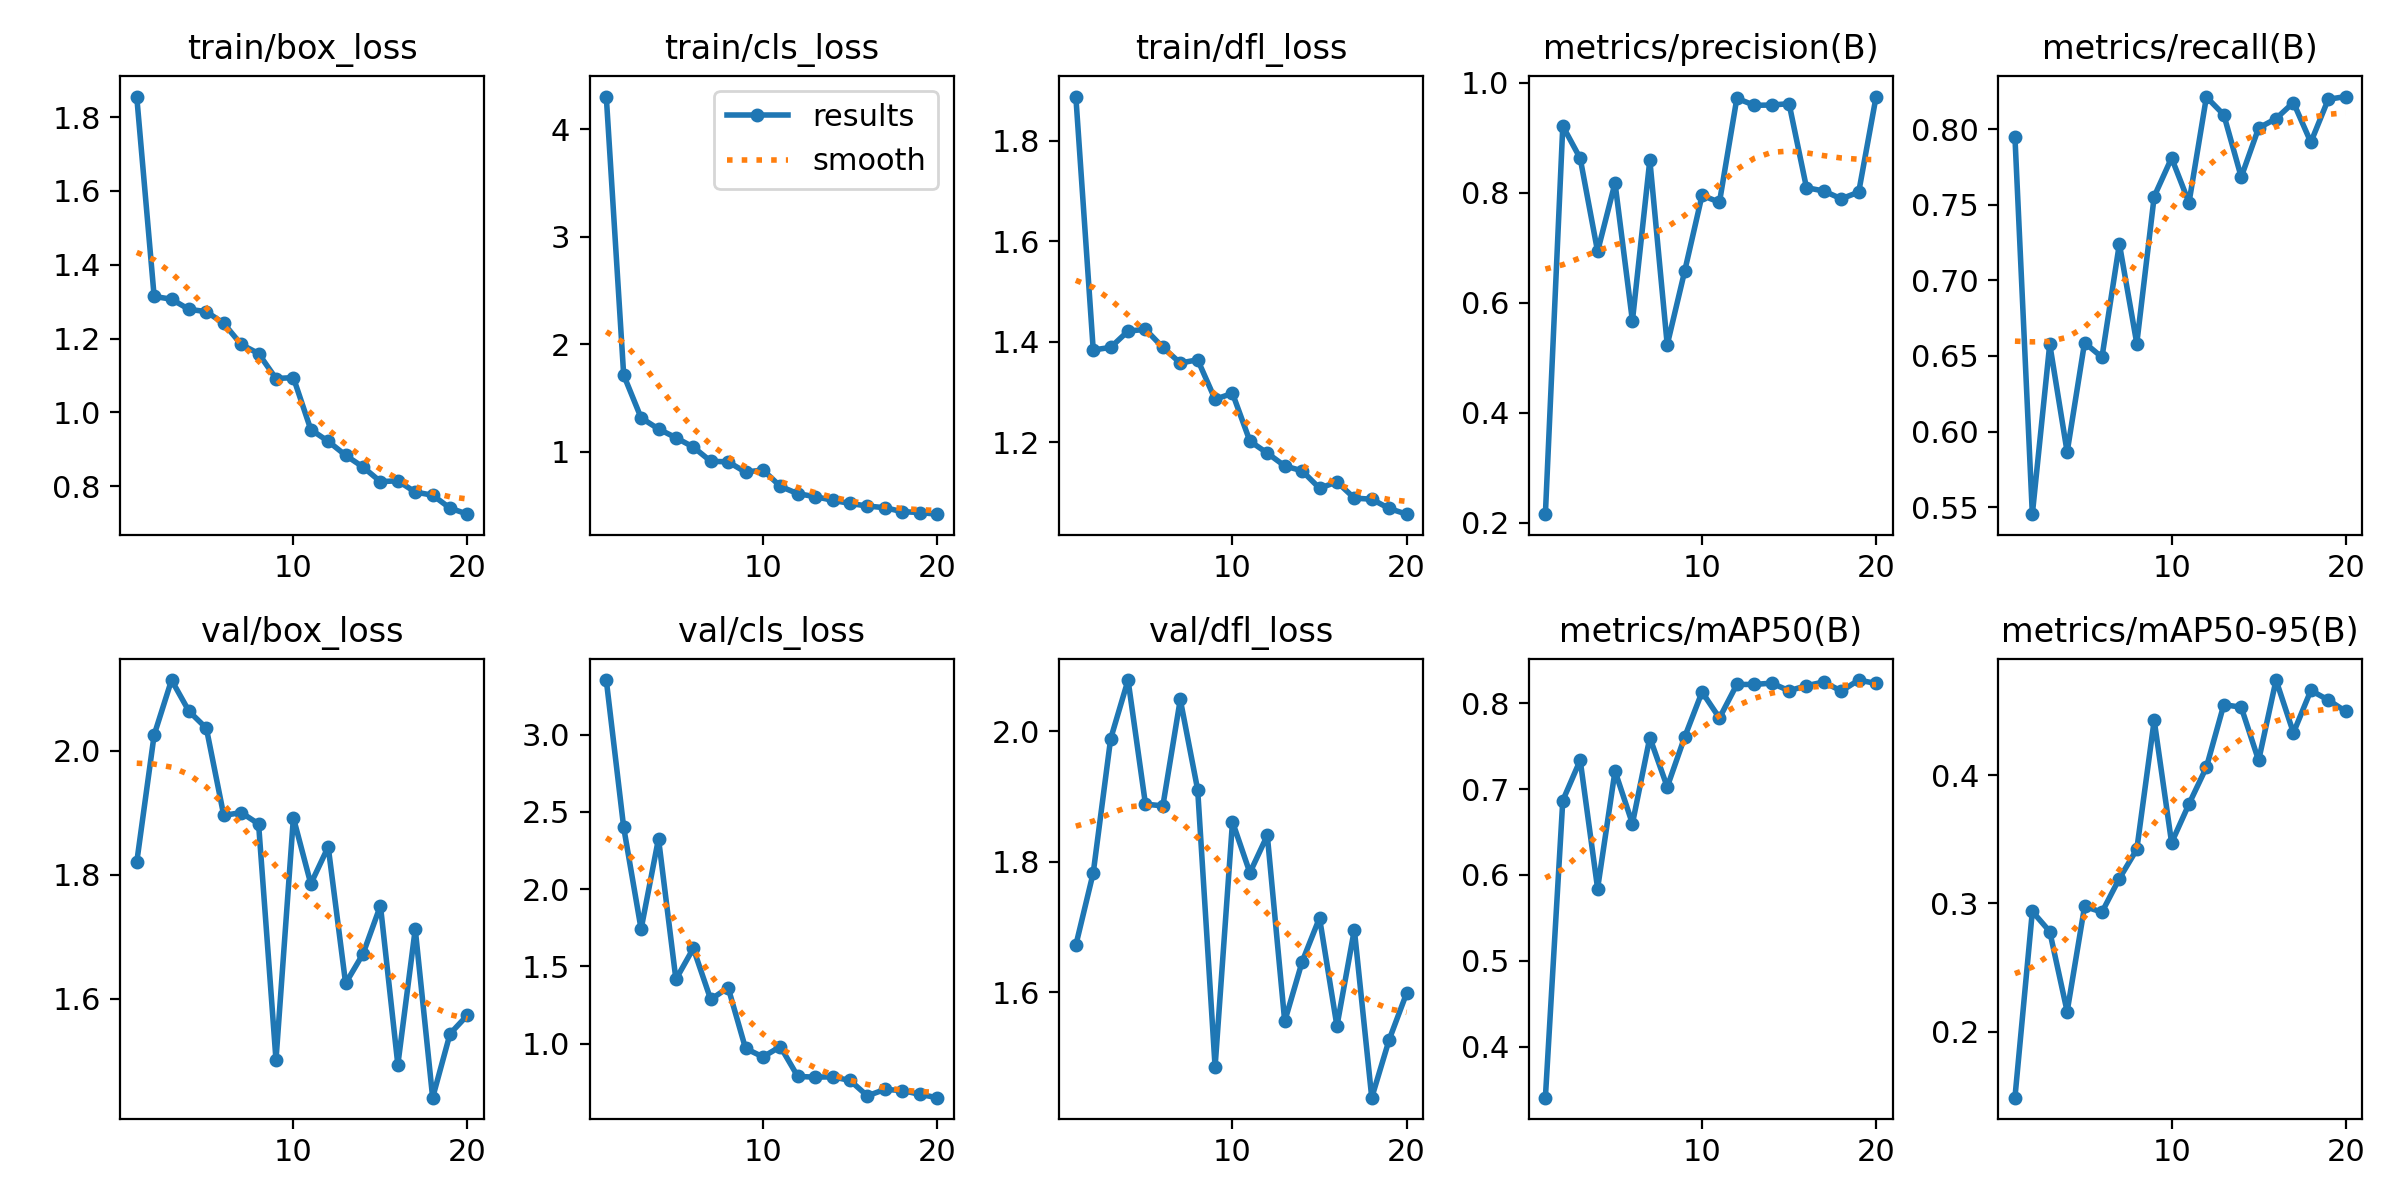

In [9]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

## Validation Mode

In [10]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Cup-Detection-v2-3/valid/labels.cache... 19 images, 0 backgrounds, 0 corrupt: 100% 19/19 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.58it/s]
                   all         19         71      0.809      0.807       0.82      0.472
             Cocio Cup         16         16       0.96          1      0.995      0.593
                   Cup         11         11          1      0.848      0.927      0.515
         Halloween cup         14         14      0.928          1      0.962      0.542
      Hand painted cup         15         15      0.968          1      0.995      0.598
             White Cup         14         14          1      0.995      0.995      0.557
                   cup          1          1    

## Prediction Mode

In [11]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source={dataset.location}/test/images

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs

image 1/10 /content/Cup-Detection-v2-3/test/images/img10_png.rf.1fd0fcc2f6a23a301d61081cc2d4073a.jpg: 640x640 1 Cocio Cup, 1 Cup, 1 Halloween cup, 1 Hand painted cup, 1 White Cup, 16.3ms
image 2/10 /content/Cup-Detection-v2-3/test/images/img1_png.rf.5daff3e408e1fd5975496a089b6d8229.jpg: 640x640 1 Cocio Cup, 1 Cup, 1 Halloween cup, 1 Hand painted cup, 1 White Cup, 16.3ms
image 3/10 /content/Cup-Detection-v2-3/test/images/img34_png.rf.bda5b0247fd2b04401cd4bf31084c623.jpg: 640x640 1 Cup, 1 Halloween cup, 1 Hand painted cup, 1 White Cup, 1 cup, 16.2ms
image 4/10 /content/Cup-Detection-v2-3/test/images/img43_png.rf.7760ddd4d75dc1bdda41cefd09cd3ffb.jpg: 640x640 1 Cocio Cup, 1 Cup, 1 Halloween cup, 1 Hand painted cup, 1 White Cup, 16.2ms
image 5/10 /content/Cup-Detection-v2-3/test/images/img59_png.rf.5fd0f9c99e67da7dc735600e9f07b

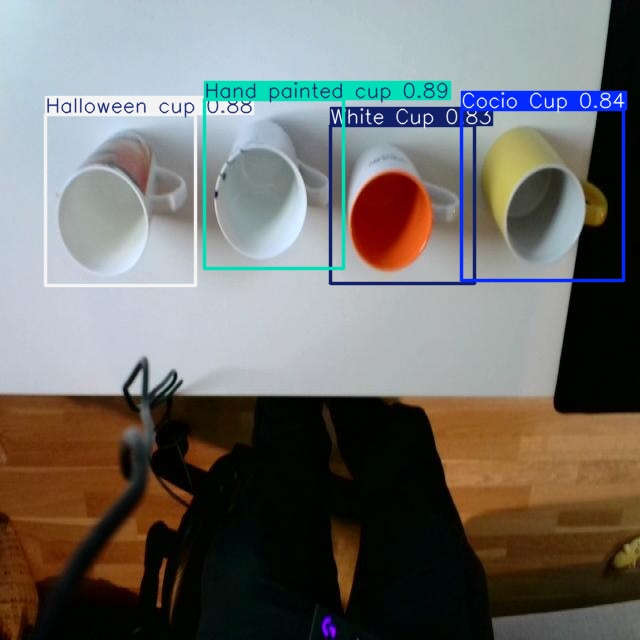

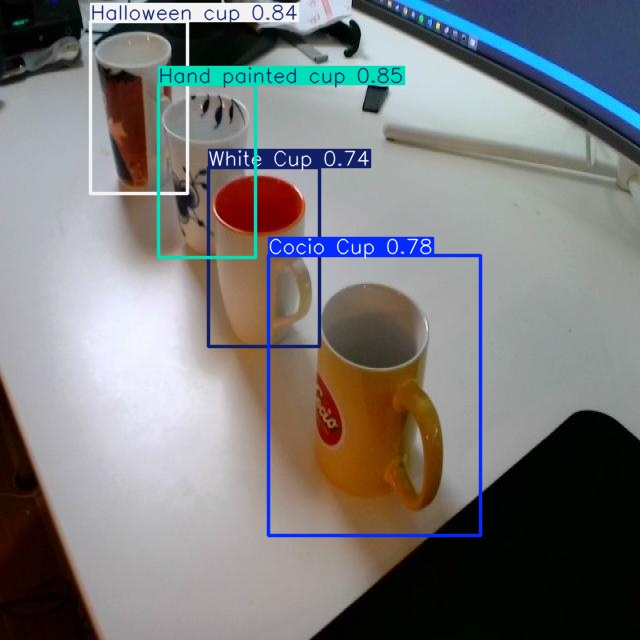

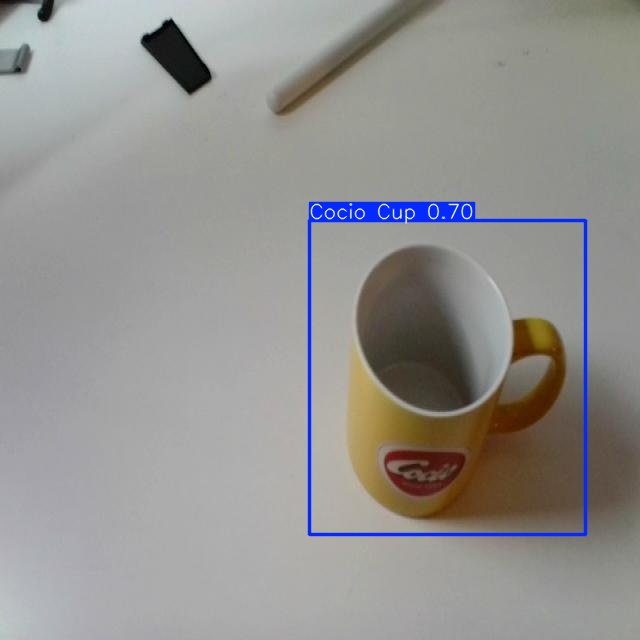

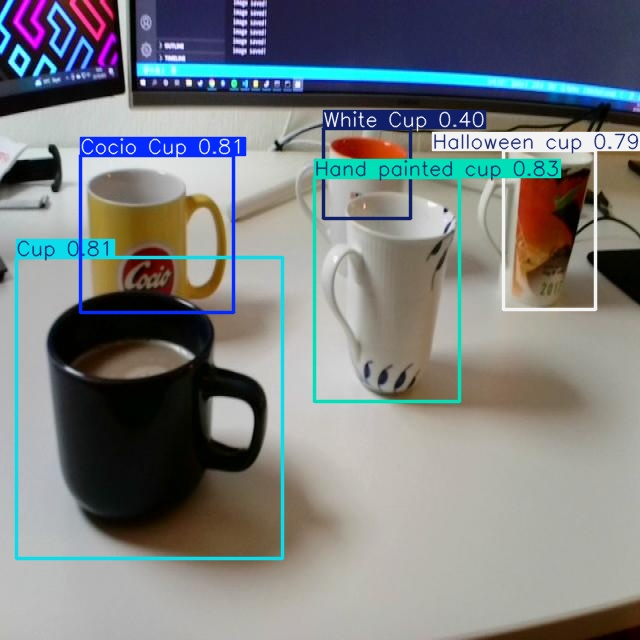

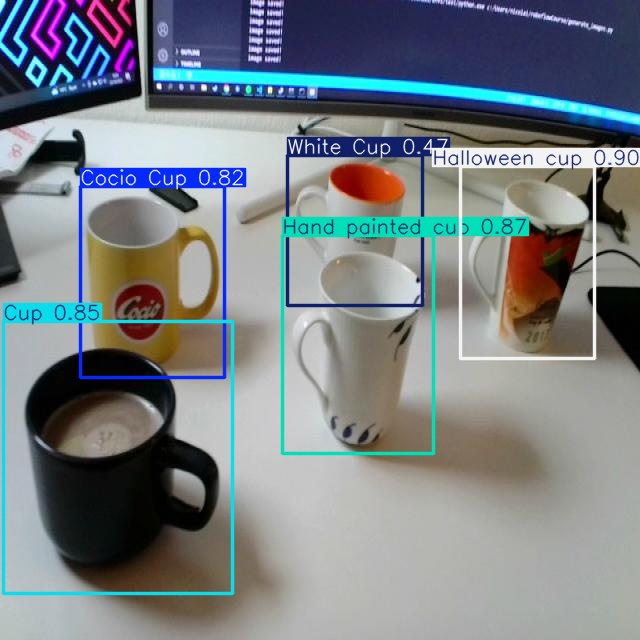

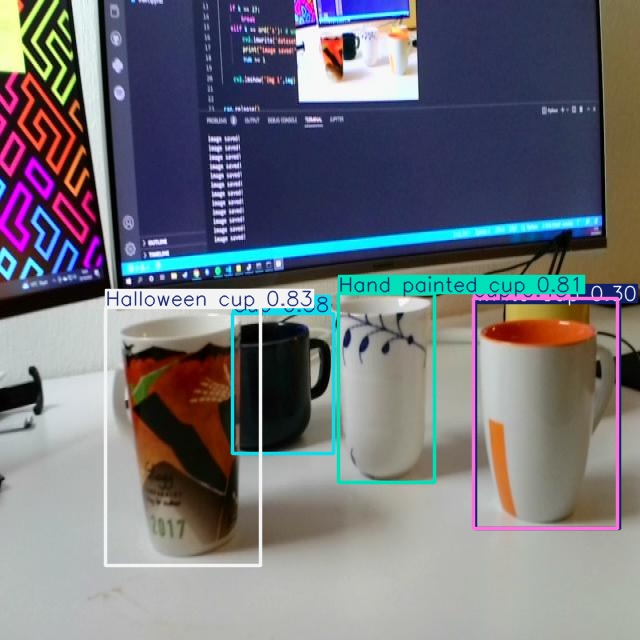

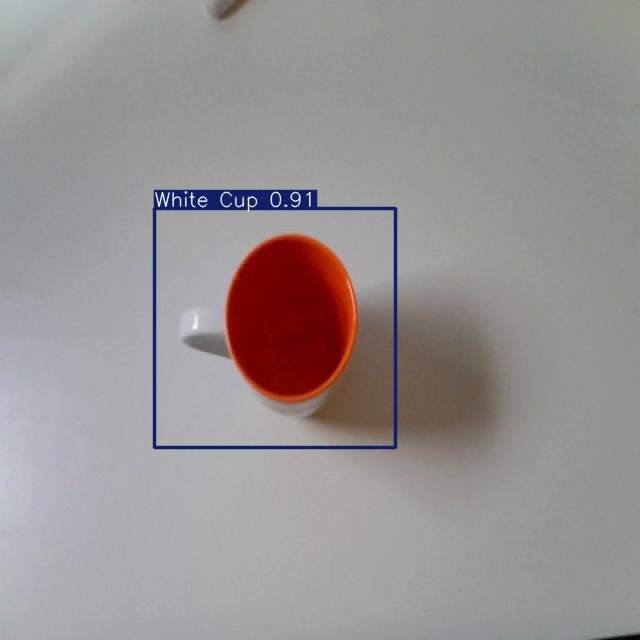

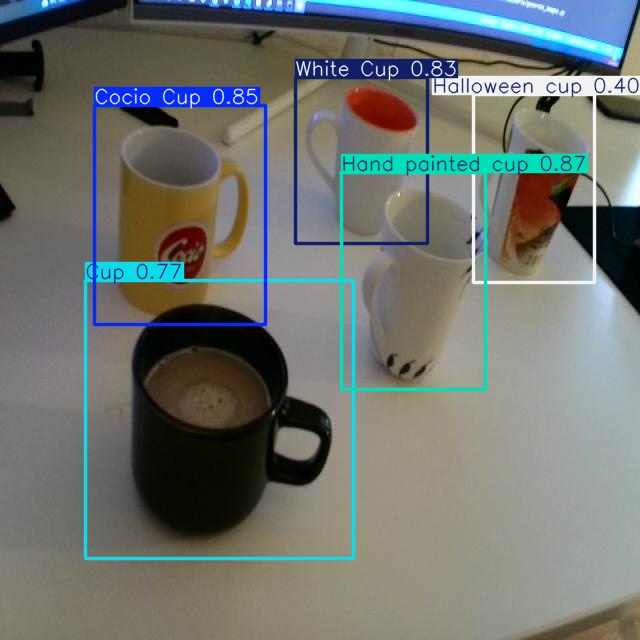

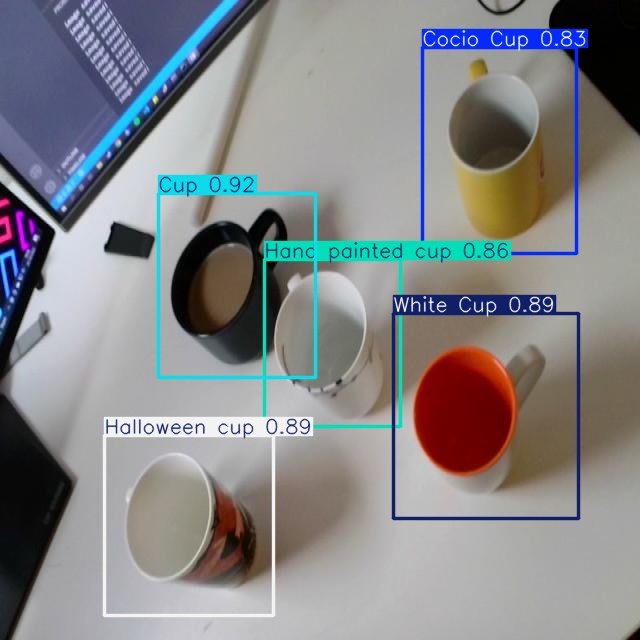

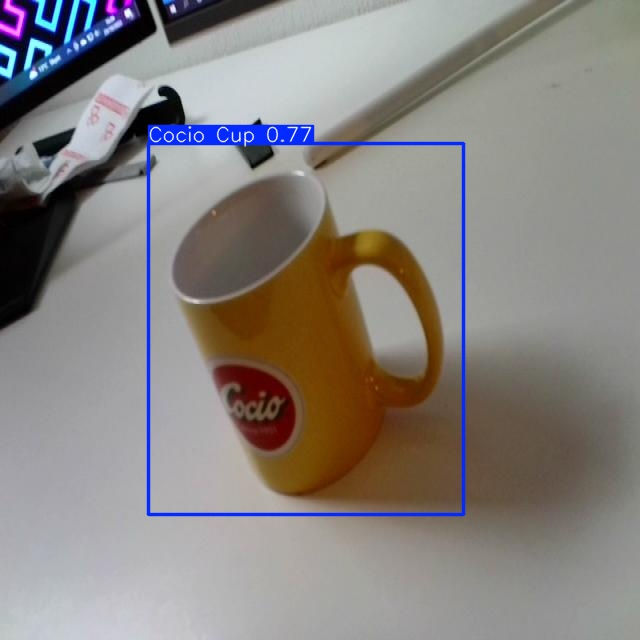

In [12]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict/*.jpg'):
    display(Image(filename=image_path, width=600))
    print("\n")